In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
df = pd.read_csv('T20.csv')

In [19]:
# Overview of the dataset
print(df.info())
print(df.describe())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2006 non-null   int64  
 1   Player      2006 non-null   object 
 2   Span        2006 non-null   int64  
 3   Mat         2006 non-null   int64  
 4   Inns        2006 non-null   int64  
 5   NO          2006 non-null   int64  
 6   Runs        2006 non-null   int64  
 7   HS          2006 non-null   object 
 8   Ave         2006 non-null   object 
 9   BF          2006 non-null   int64  
 10  SR          2006 non-null   float64
 11  100         2006 non-null   int64  
 12  50          2006 non-null   int64  
 13  0           2006 non-null   int64  
 14  4s          2006 non-null   int64  
 15  6s          2006 non-null   int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 250.9+ KB
None
        Unnamed: 0          Span          Mat         Inns           NO  \
count  200

In [20]:
df.isnull().sum()

Unnamed: 0    0
Player        0
Span          0
Mat           0
Inns          0
NO            0
Runs          0
HS            0
Ave           0
BF            0
SR            0
100           0
50            0
0             0
4s            0
6s            0
dtype: int64

In [21]:
# Remove duplicates
df.drop_duplicates(inplace=True)


In [24]:
# Convert columns to appropriate data types
df['Runs'] = df['Runs'].astype(int)



In [23]:
# Calculate strike rate if missing
df['SR'] = (df['Runs'] / df['BF']) * 100



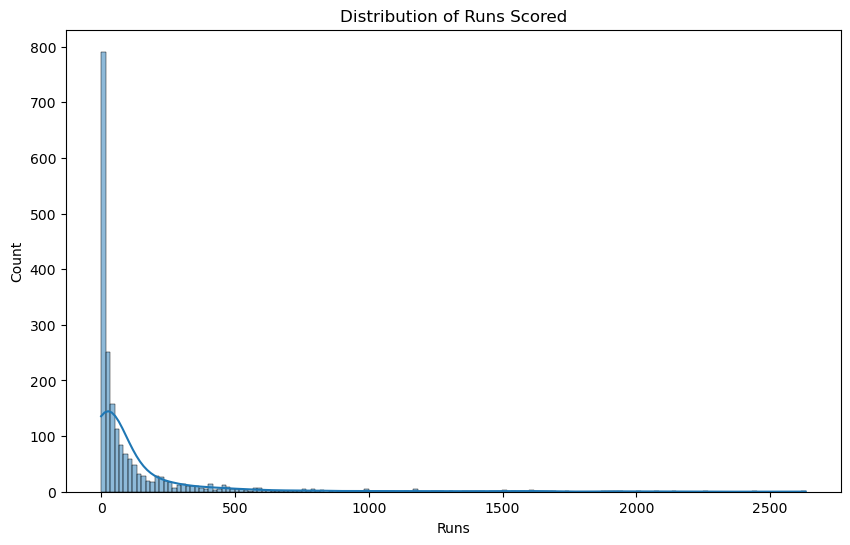

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of runs scored
plt.figure(figsize=(10,6))
sns.histplot(df['Runs'], kde=True)
plt.title('Distribution of Runs Scored')
plt.show()


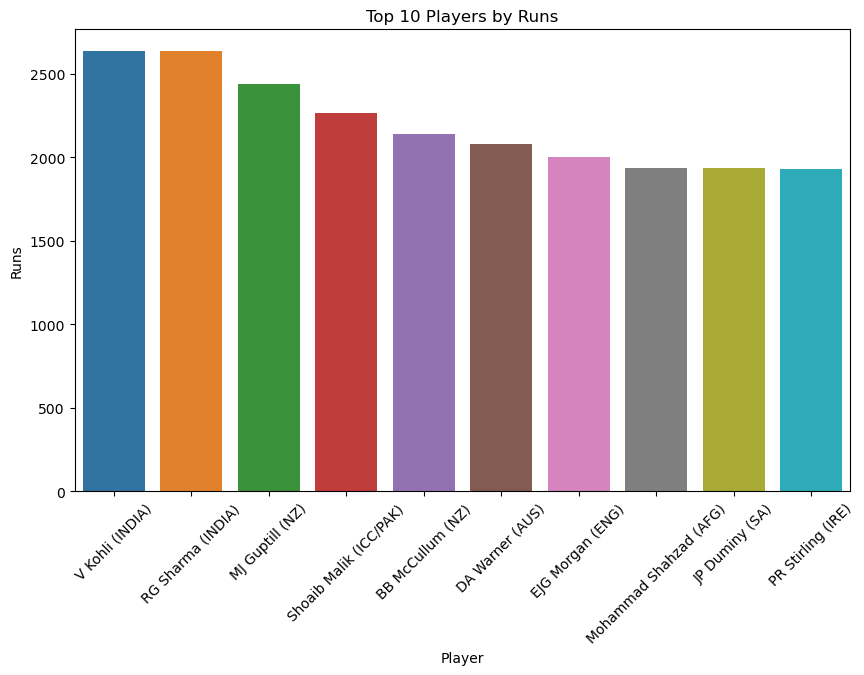

In [26]:

# Top 10 players by runs
top_players = df.nlargest(10, 'Runs')
plt.figure(figsize=(10,6))
sns.barplot(x='Player', y='Runs', data=top_players)
plt.title('Top 10 Players by Runs')
plt.xticks(rotation=45)
plt.show()


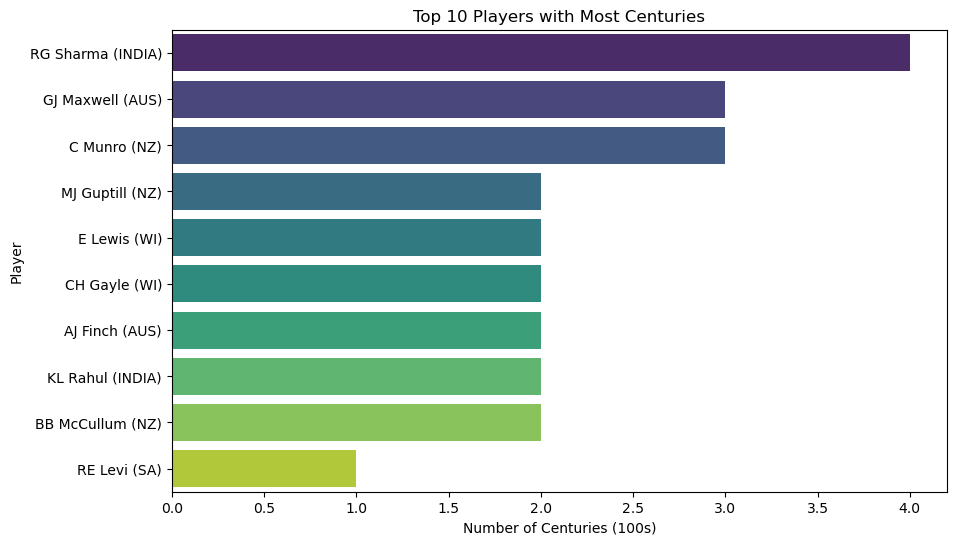

In [27]:

# Top players with the most centuries
top_100s = df.groupby('Player')['100'].sum().reset_index().sort_values(by='100', ascending=False).head(10)

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='100', y='Player', data=top_100s, palette='viridis')
plt.title('Top 10 Players with Most Centuries')
plt.xlabel('Number of Centuries (100s)')
plt.ylabel('Player')
plt.show()

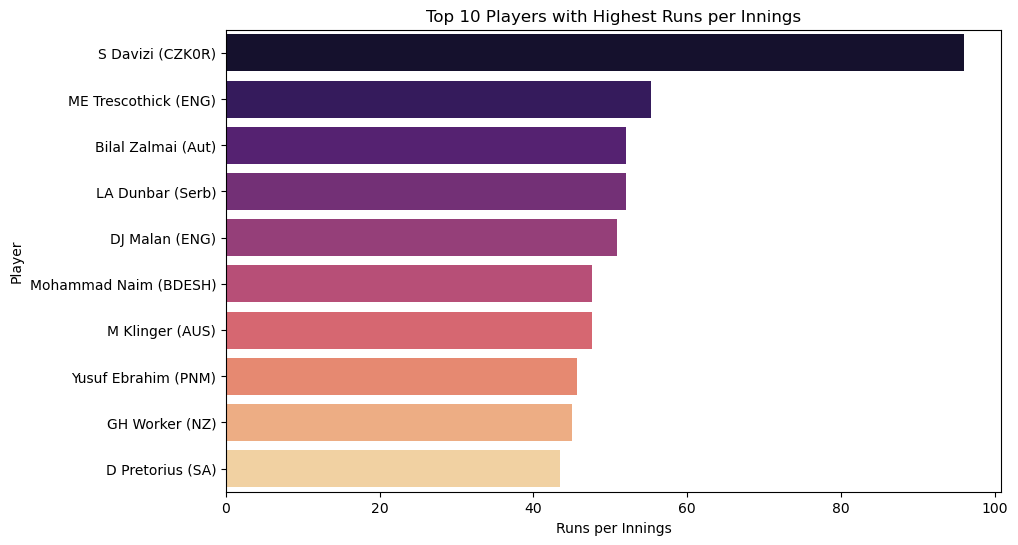

In [29]:
# Calculate Runs per Innings
df['Runs_per_Inns'] = df['Runs'] / df['Inns']

# Top players with the highest Runs per Innings
top_runs_per_inns = df[['Player', 'Runs_per_Inns']].sort_values(by='Runs_per_Inns', ascending=False).head(10)

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Runs_per_Inns', y='Player', data=top_runs_per_inns, palette='magma')
plt.title('Top 10 Players with Highest Runs per Innings')
plt.xlabel('Runs per Innings')
plt.ylabel('Player')
plt.show()


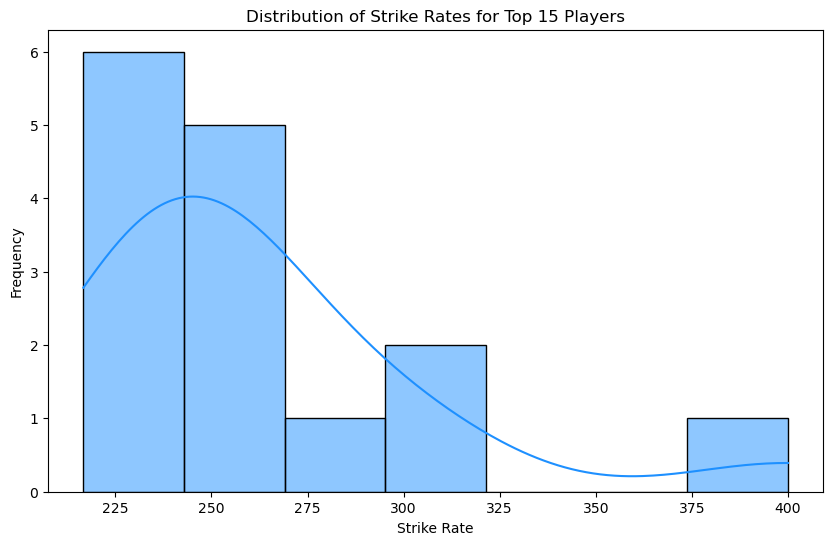

In [51]:
# Step 1: Sort the DataFrame by Strike Rate in descending order and filter the top 15 players
top_15_sr = df.sort_values(by='SR', ascending=False).head(15)

# Step 2: Plot the distribution of strike rates for the top 15 players
plt.figure(figsize=(10, 6))
sns.histplot(top_15_sr['SR'].dropna(), kde=True, color='dodgerblue')
plt.title('Distribution of Strike Rates for Top 15 Players')
plt.xlabel('Strike Rate')
plt.ylabel('Frequency')
plt.show()

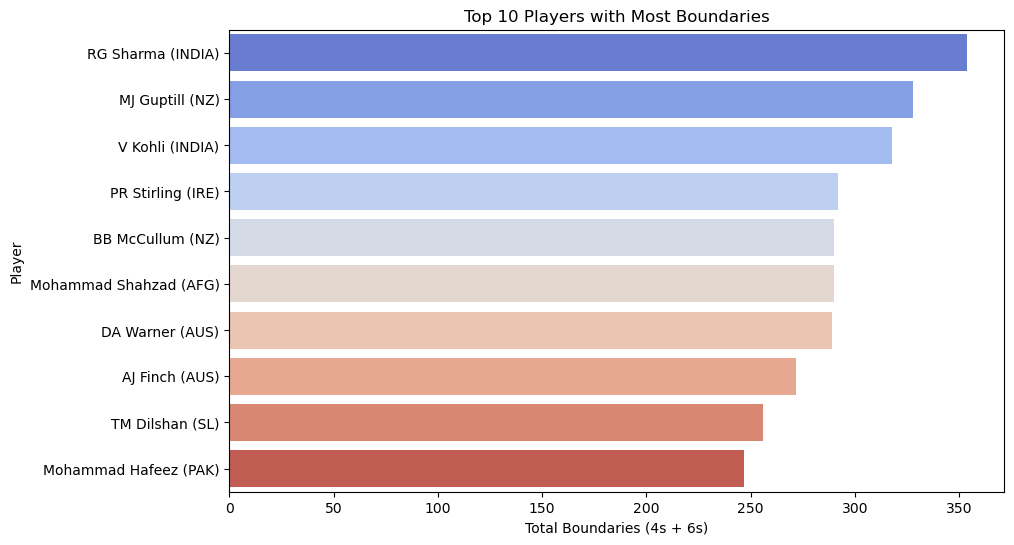

In [32]:
# Total boundaries (4s + 6s)
df['Total_Boundaries'] = df['4s'] + df['6s']

# Top players with the most boundaries
top_boundaries = df[['Player', 'Total_Boundaries']].sort_values(by='Total_Boundaries', ascending=False).head(10)

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Boundaries', y='Player', data=top_boundaries, palette='coolwarm')
plt.title('Top 10 Players with Most Boundaries')
plt.xlabel('Total Boundaries (4s + 6s)')
plt.ylabel('Player')
plt.show()


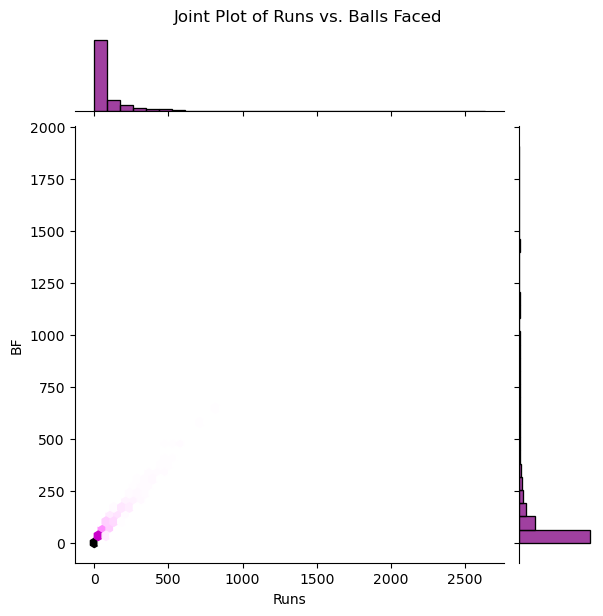

In [33]:
# Joint plot: Runs vs Balls Faced with marginal distributions
sns.jointplot(x='Runs', y='BF', data=df, kind='hex', color='purple', marginal_kws=dict(bins=30, fill=True))

# Customize the plot
plt.suptitle('Joint Plot of Runs vs. Balls Faced', y=1.02)
plt.show()


C:\Users\Ashruth Reddy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Ashruth Reddy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Ashruth Reddy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Ashruth Reddy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\Ashruth Reddy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\Ashruth Reddy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: Use

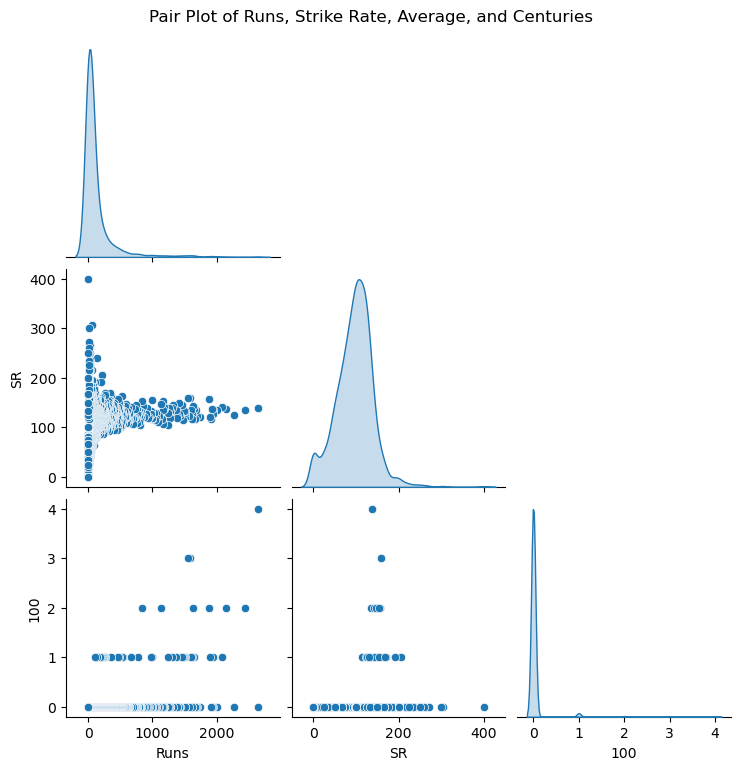

In [34]:
# Pair plot to visualize relationships between multiple metrics
sns.pairplot(df[['Runs', 'SR', 'Ave', '100']], diag_kind='kde', corner=True, palette='Set2')

# Customize the plot
plt.suptitle('Pair Plot of Runs, Strike Rate, Average, and Centuries', y=1.02)
plt.show()


C:\Users\Ashruth Reddy\AppData\Local\Temp\ipykernel_34468\372548258.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[['Runs', 'BF', 'SR', '100', '50', 'Ave', '4s', '6s']].corr()


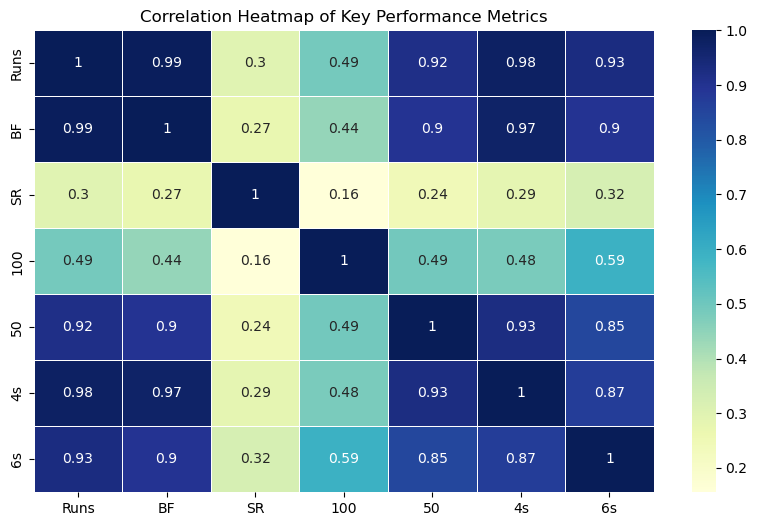

In [35]:
# Compute the correlation matrix
correlation_matrix = df[['Runs', 'BF', 'SR', '100', '50', 'Ave', '4s', '6s']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)

# Customize the plot
plt.title('Correlation Heatmap of Key Performance Metrics')
plt.show()


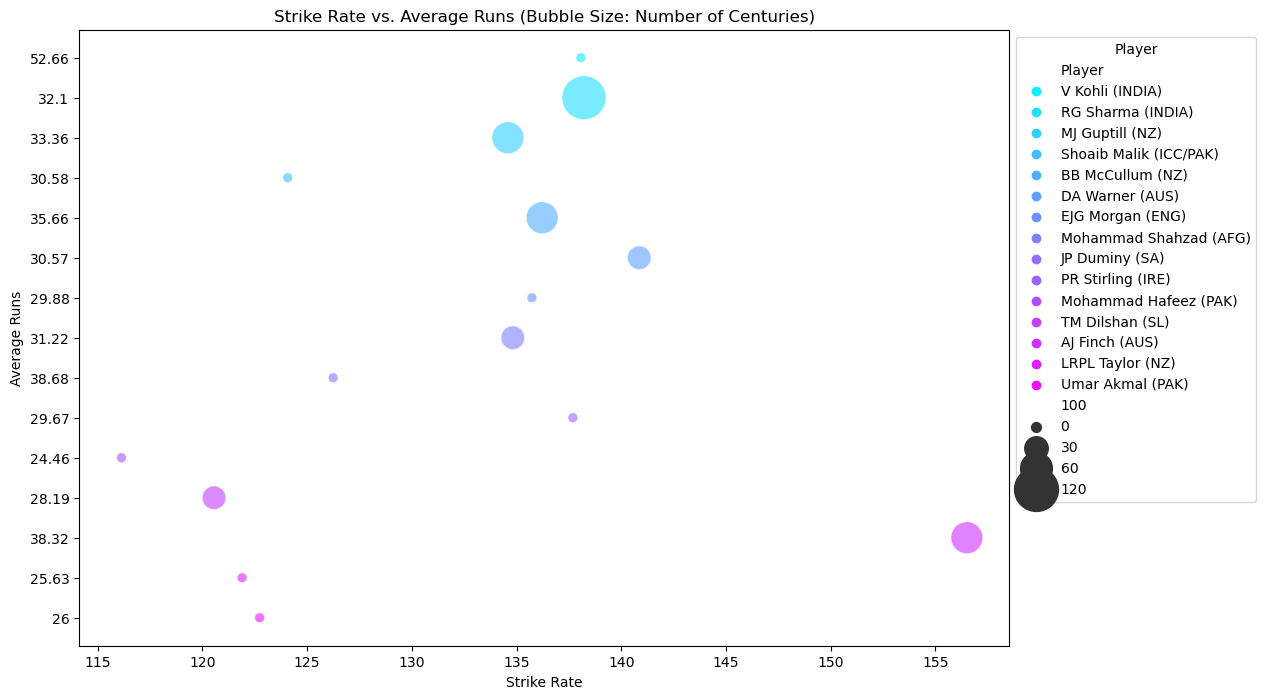

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Sort the DataFrame by 'Runs' to get the top 15 players
top_15_df = df.sort_values(by='Runs', ascending=False).head(15)

# Step 2: Scale the bubble size based on century count
bubble_size = top_15_df['100'] * 30  # Scale century count for bubble size

# Step 3: Plot: Strike Rate vs. Average Runs with Century Count as Bubble Size
plt.figure(figsize=(12, 8))
sns.scatterplot(x='SR', y='Ave', size=bubble_size, sizes=(50, 1000), hue='Player', data=top_15_df, alpha=0.6, palette='cool')

# Customize the plot
plt.title('Strike Rate vs. Average Runs (Bubble Size: Number of Centuries)')
plt.xlabel('Strike Rate')
plt.ylabel('Average Runs')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Player')
plt.show()


C:\Users\Ashruth Reddy\AppData\Local\Temp\ipykernel_34468\1776670275.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data[metrics] = player_data[metrics].apply(pd.to_numeric, errors='coerce')


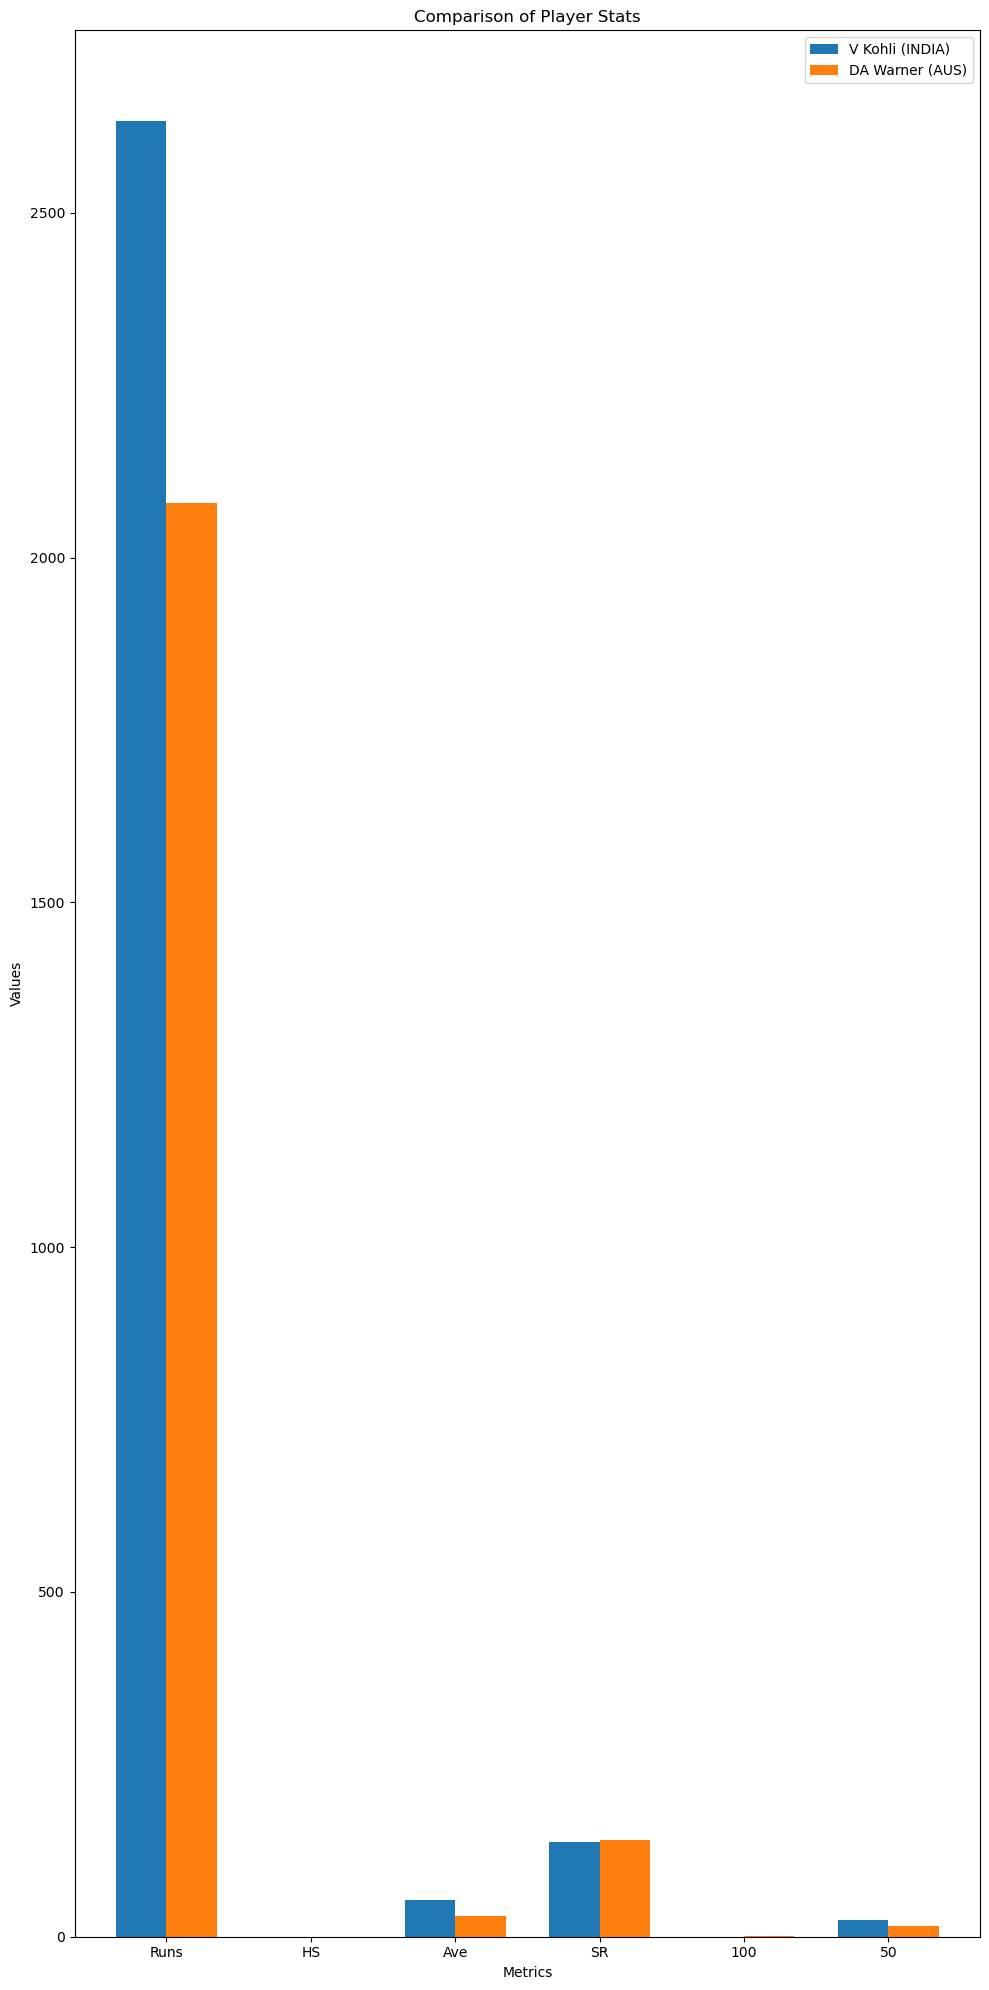

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Select two players to compare
player1 = 'V Kohli (INDIA)'
player2 = 'DA Warner (AUS)'

# Filter the data for the two players
player_data = df[df['Player'].isin([player1, player2])]

# Check if the players exist in the data
if player_data.empty or len(player_data) < 2:
    print("One or both players not found in the dataset. Please check the player names.")
else:
    # Step 2: Define the metrics you want to compare
    metrics = ['Runs', 'HS', 'Ave', 'SR', '100', '50']

    # Convert columns to numeric, forcing errors to NaN
    player_data[metrics] = player_data[metrics].apply(pd.to_numeric, errors='coerce')

    # Handle NaN values (either fill with 0 or drop rows with NaN)
    player_data = player_data.fillna(0)  # Alternatively, you can use player_data.dropna()

    # Normalize data for better comparison
    player_data_normalized = player_data[metrics].apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)

    # Step 3: Create a bar plot
    def create_bar_plot(player_data, players, metrics):
        # Set up the figure and axis
        fig, ax = plt.subplots(figsize=(10, 20))

        # Define the bar width and positions
        bar_width = 0.35
        index = np.arange(len(metrics))

        # Plot the data for each player
        for i, player in enumerate(players):
            ax.bar(index + i * bar_width, player_data.loc[player_data['Player'] == player, metrics].values.flatten(),
                   bar_width, label=player)

        # Set labels and title
        ax.set_xlabel('Metrics')
        ax.set_ylabel('Values')
        ax.set_title('Comparison of Player Stats')
        ax.set_xticks(index + bar_width / 2)
        ax.set_xticklabels(metrics)
        ax.legend()

        plt.tight_layout()
        plt.show()

    # Step 4: Plot bar plot for the two players
    create_bar_plot(player_data, [player1, player2], metrics)



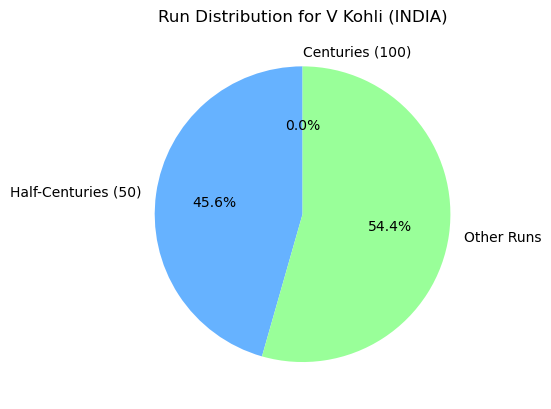

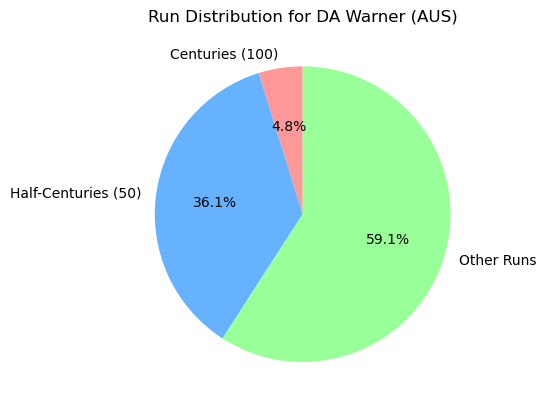

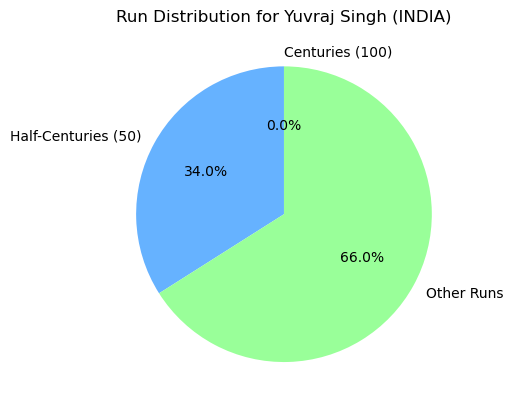

In [71]:


import matplotlib.pyplot as plt

# Function to calculate and plot the pie chart for a player
def plot_pie_chart(player_data, player_name):
    # Filter the data for the player
    player_data_filtered = player_data[player_data['Player'] == player_name]
    
    # Check if the player data is not empty
    if player_data_filtered.empty:
        print(f"No data available for {player_name}. Please check the player's name or the dataset.")
        return
    
    # Extract the player's first row
    player = player_data_filtered.iloc[0]
    
    # Calculate runs from centuries, half-centuries, and remaining runs
    try:
        runs_from_100s = player['100'] * 100
        runs_from_50s = player['50'] * 50
        remaining_runs = player['Runs'] - (runs_from_100s + runs_from_50s)
    except KeyError as e:
        print(f"Missing expected column in the dataset: {e}")
        return

    # Labels and values for the pie chart
    labels = ['Centuries (100)', 'Half-Centuries (50)', 'Other Runs']
    values = [runs_from_100s, runs_from_50s, remaining_runs]
    
    # Plot the pie chart
    fig, ax = plt.subplots()
    ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B2FF', '#99FF99'])
    ax.set_title(f'Run Distribution for {player_name}')
    
    plt.show()

# Step 1: Select three players to compare
player1 = 'V Kohli (INDIA)'
player2 = 'DA Warner (AUS)'
player3 = 'Yuvraj Singh (INDIA)'  # New third player

# Filter the data for the three players
player_data = df[df['Player'].isin([player1, player2, player3])]

# Check if we have data for each player and plot pie charts
for player in [player1, player2, player3]:
    plot_pie_chart(player_data, player)
